# Misure ripetute e inferenza bayesiana

In generale, vedremo che la presenza di più misure ripetute ha l'effetto di ridurre l'intevello di incertezza.

Partiamo sempre da una distribuzione gaussiana per una variabile $x$ con valor medio $\mu$ e deviazione standard $\sigma$.

Ma questa volta consideriamo $n$ osservazioni, o misure, $x_1, \cdots, x_n$.

La distribuzione di probabilità congiunta è:

$\displaystyle p(x_1, \cdots, x_n;\theta) = \prod_{i=1}^n p(x_i;\theta)$

Nel caso gaussiano:

$\displaystyle p(x_1, \cdots, x_n;\mu,\sigma) = \frac{1}{(2\pi)^{n/2}\sigma^n} \exp\left[{-\sum_{i=1}^n\frac{(x_i-\mu)^2}{2\sigma^2}}\right]$

La distribuzione a posteriori per $\mu$ si può scrivere, se $\sigma$ è noto, come:

$\displaystyle p(\mu;x_1,\cdots,x_n) = \frac{p(x_1, \cdots, x_n;\mu,\sigma)\,\pi(\mu)}{\int p(x_1, \cdots, x_n;\mu^\prime,\sigma)\,\pi(\mu^\prime)\,\mathrm{d}\mu^\prime}$

Se assumiamo una probabilità a priori uniforme per $\mu$, ossia $\pi(\mu)=\mathrm{cost.}$, diventa:

$\displaystyle p(\mu;x_1, \cdots, x_n) = 
\frac{1}{(2\pi)^{n/2}\sigma^n} \exp\left[{-\sum_{i=1}^n\frac{(x_i-\mu)^2}{2\sigma^2}}\right] \Biggm/ \int_{-\infty}^{+\infty} \frac{1}{(2\pi)^{n/2}\sigma^n} \exp\left[{-\sum_{i=1}^n\frac{(x_i-\mu^\prime)^2}{2\sigma^2}}\right]\,\mathrm{d}\mu^\prime$

$\displaystyle = C \exp\left[{-\frac{\sum_{i=1}^n(x_i-\mu)^2}{2\sigma^2}}\right]$

Dove $C$ è una costante di normalizzazione.

Va notato che la forma:

$\displaystyle\Sigma=\sum_{i=1}^n(x_i-\mu)^2$

È un polinomio di secondo grado in $\mu$:

$\displaystyle\Sigma=\sum_{i=1}^n(\mu^{2} - 2x_i\mu+ x_i^2) = 
n \mu^{2} - 2\mu \sum_{i=1}^n x_i + \sum_{i=1}^n x_i^2
$

In sostanza, la PDF a posteriori è ancora una gaussiana:

$\displaystyle\Sigma=
n\left(\mu^{2}  - 2\mu \frac{1}{n}\sum_{i=1}^n x_i + \frac{1}{n}\sum_{i=1}^n x_i^2
\right) = \\
n\left(
\mu^2 - 2\mu\bar{x} - \overline{x^2}
\right)
=  n\left(
(\mu - \bar{x})^2 + (\overline{x^2} -\bar{x}^2)
\right)
=  n\left(
(\mu - \bar{x})^2 + \sigma_{\bar{x}}^2\right)$

Dove, al solito:

$\displaystyle \bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$

$\displaystyle \overline{x^2} = \frac{1}{n}\sum_{i=1}^n x_i^2$

e avendo definito: 

$\displaystyle\sigma_{\bar{x}}^2 = \frac{1}{n}(\overline{x^2} - \bar{x}^2)$

Quindi, a meno di una costante di normalizzazione:

$\displaystyle p(\mu;x_1, \cdots, x_n) = C^\prime \exp\left[{-\frac{(\mu - \bar{x})^2}{2\sigma^2}}\right]$

Siccome la distribuzione è gaussiana, la costante di normalizzazione la conosciamo:

$\displaystyle p(\mu;x_1, \cdots, x_n) = \frac{1}{\sqrt{2\pi}\sigma^2} \exp\left[{-\frac{(\mu - \bar{x})^2}{2\sigma^2}}\right]$

<span style="color: blue;">L'effetto netto di avere $n$ misure, quindi, è di ridurre la varianza della PDF di un fattore $\sqrt{n}$ rispetto alla singola misura.</span>

Il valore più probabile di $\mu$ è $\mu=\hat{\mu} = \bar{x}$, e la deviazione standard della PDF a posteriori è $\sigma/\sqrt{n}$.

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math

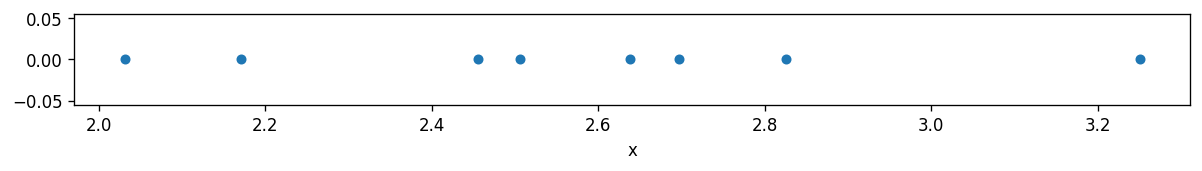

In [2]:
sigma = 0.4
mu = 2.5
x_obs = norm.rvs(loc=mu, scale=sigma, size=8)
plt.figure(figsize=(12,1), dpi=120)
plt.plot(x_obs, np.zeros(len(x_obs)), '.', markersize=10)
plt.xlabel('x')
plt.show()

Di seguito, solo a titolo di esempio, calcoliamo il prodotto degli $n$ termini gaussiano e verifichiamo numericamente che il risultato sia ancora una gaussiana. 

L'algoritmo è inefficiente, ma ha solo uno scopo dimostrativo, e potremo applicarlo a casi meno banali della distribuzione gaussiana, dove non c'è una soluzione analitica.

In [3]:
def like(mu):
    return np.array([norm.pdf(x, loc=mu, scale=sigma) for x in x_obs]).prod()
like_v = np.vectorize(like)

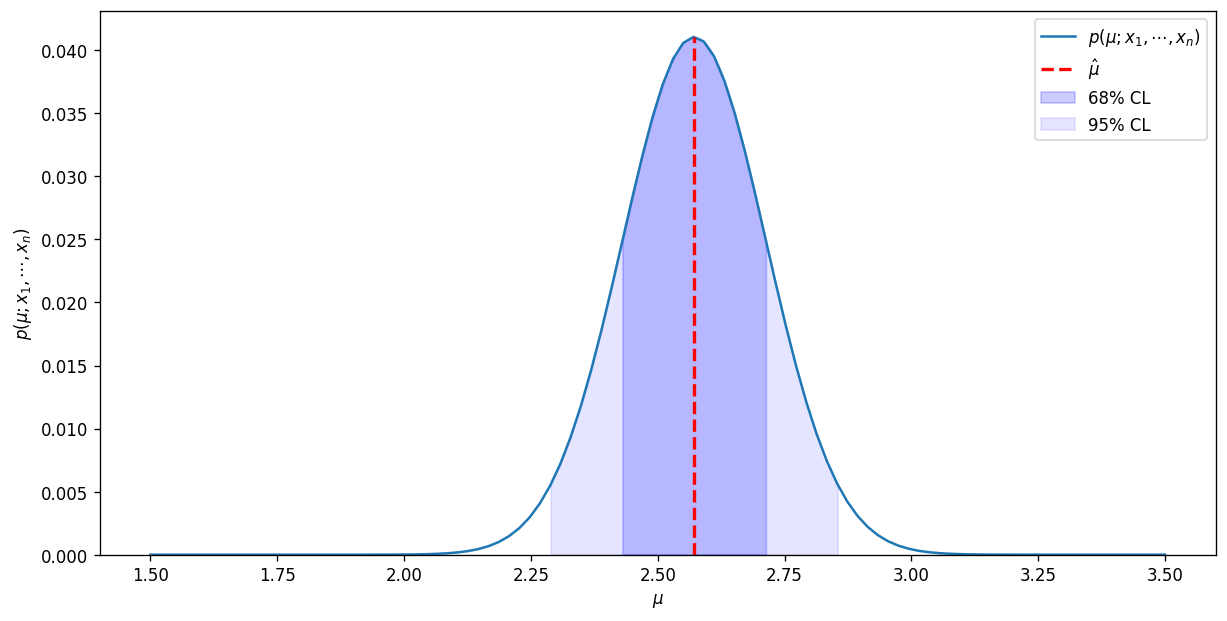

In [5]:
mu0 = x_obs.mean()
s0 = sigma/math.sqrt(len(x_obs))

mu_range=np.linspace(1.5, 3.5, 100)

x_1s = np.linspace(mu0-s0, mu0+s0, 100)
y_1s = like_v(x_1s)

x_2s = np.linspace(mu0-2*s0, mu0+2*s0, 100)
y_2s = like_v(x_2s)

plt.figure(figsize=(12,6), dpi=120)
plt.plot(mu_range, like_v(mu_range), label=r'$p(\mu;x_1,\cdots,x_n)$')
plt.fill_between(x_1s, y_1s, alpha=0.2, color='blue', label='68% CL')
plt.fill_between(x_2s, y_2s, alpha=0.1, color='blue', label='95% CL')
plt.plot([mu0, mu0], [0,like(mu0)], color='red', linewidth=2, linestyle='--', label=r'$\hat{\mu}$')
plt.ylim(bottom=0)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(\mu;x_1,\cdots,x_n)$')
plt.legend()
plt.show()

Come detto sopra, avremmo potuto risparmiarci di fare il prodotto di $n$ gaussiane, che, in questa implementazione, fa solo rallentare il programa. 

## Distribuzione esponenziale

La distribuzione di probabilità congiunta, nel caso esponenziale, è:

$\displaystyle p(x_1, \cdots, x_n;\lambda) = \prod_{i=1}^n \lambda\exp\left(-\lambda x_i
\right) =
\lambda^n \exp\left(-\lambda\sum_{i=1}^n x_i
\right) =
\lambda^n \exp(-n\lambda\bar{x})
$

Un caso simile lo abbiamo già visto in precedenza.

<span style="color:red">**Nota**: se avessi definito la PDF come:</span>
    
<span style="color:red">$\displaystyle p(x;\tau) = \frac{1}{\tau} \exp(-x/\tau)$</span>
    
<span style="color:red">La PDF a posteriori per $\tau$ avrebbe avuto una forma diversa. **Assumere $\pi(\lambda)$ uniforme non equivale ad assumere $\pi(\tau)$ uniforme!**
</span>

La PDF aposteriori, se $\pi(\lambda)$ è una costante, si può scrivere come $p(x_1, \cdots, x_n;\lambda)$ moltiplicato un fattore di normalizzazione rispetto a $\lambda$.

$\displaystyle p(\lambda; x_1, \cdots, x_n;) = C\,p(x_1, \cdots, x_n;\lambda)
= C\,\lambda^n \exp(-n\lambda\bar{x})$

$C$ si può calcolare analiticamente in questo caso, oppure, in generale, numericamente.

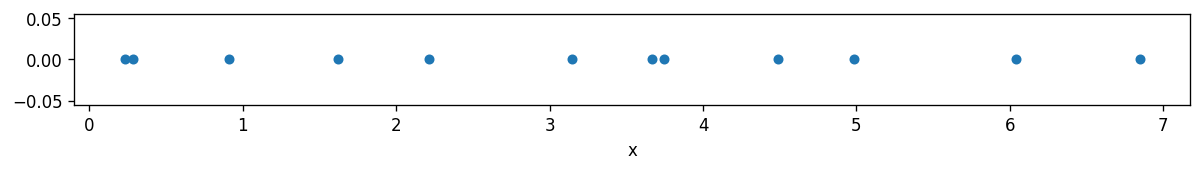

In [37]:
from scipy.stats import expon
lam = 0.4
x_obs = expon.rvs(scale=1/lam, size=12)
plt.figure(figsize=(12,1), dpi=120)
plt.plot(x_obs, np.zeros(len(x_obs)), '.', markersize=10)
plt.xlabel('x')
plt.show()

Gli argomenti della funzione di verosimiglianza sono definiti di seguito:

In [38]:
x_sum=x_obs.sum()
x_size = len(x_obs)
print("sum: ",x_sum)
print("size: ",x_size)

sum:  38.18258740154724
size:  12


In [39]:
def like_exp(lam):
    return math.pow(lam,x_size)*math.exp(-lam*x_sum)

Si può dimostrare facilmente per via analitica che il valore massimo della PDF a posteriori è pari a:

$\hat{\lambda} = 1/\bar{x}$

Il calcolo analitico del fattore di normalizzazione $C$ richiede l'uso delle [funzioni $\Gamma$](https://mathworld.wolfram.com/GammaFunction.html), argomento un po' tecnico dell'analisi matematica.

Proviamo a calcolare l'integrale numericamente. Non è la soluzione pià rapida, ma resta l'unico approccio quando la soluzione analitica non è possibile.

In [40]:
import scipy.integrate as integrate
norm_const = integrate.quad(like_exp, 0, 2)[0]
print("norm. constant: ", norm_const)

norm. constant:  1.3064336443301115e-12


In [41]:
def post_exp(lam):
    return like_exp(lam)/norm_const

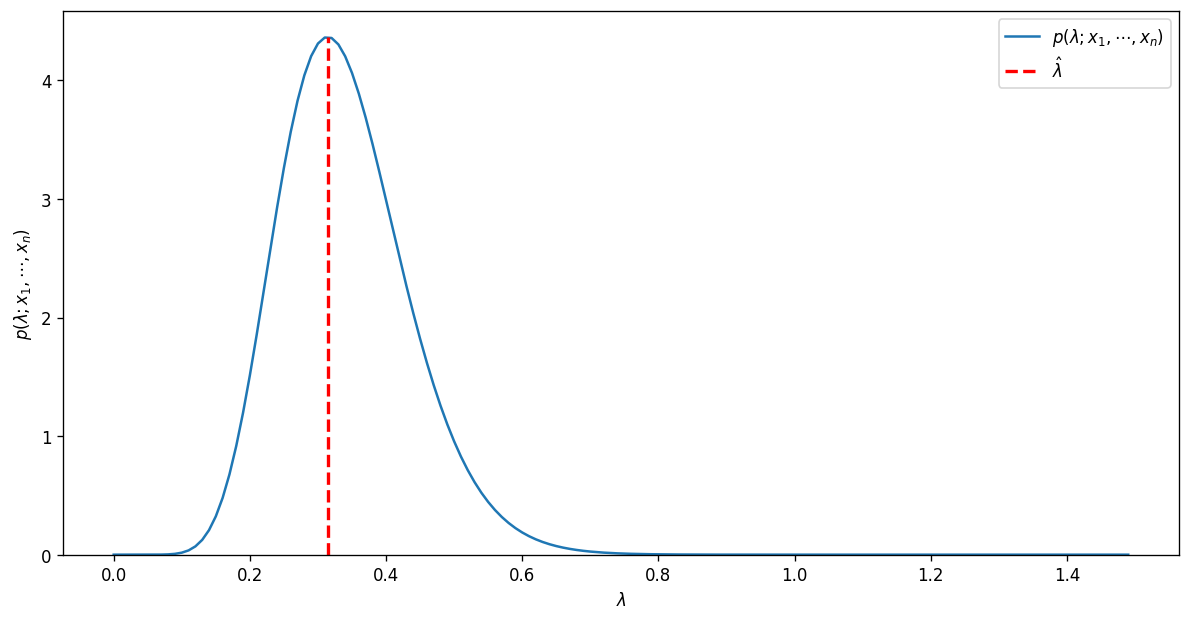

In [42]:
plt.figure(figsize=(12,6), dpi=120)
lam_range=np.arange(0, 1.5, 0.01)
post_exp_v = np.vectorize(post_exp)
plt.plot(lam_range, post_exp_v(lam_range), label=r'$p(\lambda;x_1,\cdots,x_n)$')
lam0 = 1/x_obs.mean()
plt.plot([lam0,lam0], [0,post_exp(lam0)], color='red', linewidth=2, linestyle='--', label='$\hat{\lambda}$')
plt.ylim(bottom=0)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$p(\lambda;x_1,\cdots,x_n)$')
plt.legend()
plt.show()

Possiamo calcolare la varianza di $\lambda$ come $\sigma^2_{\lambda} = \mathbb{E}(\lambda^2) - \mathbb{E}(\lambda)^2$.
I due valori di aspettazione possono essere ancora calcolati numericamente, consideando che:

$\displaystyle \mathbb{E}[\lambda^k] = \int_0^\infty\!\! \lambda^k f(\lambda)\,\mathrm{d}\lambda$

Anche qui, una soluzione analitica è possibile, ma abbiamo di seguito un'implementazione numerica.

In [43]:
def post_exp_l1(lam):
    return lam*post_exp(lam)
def post_exp_l2(lam):
    return lam*lam*post_exp(lam)

In [44]:
lam1_expt = integrate.quad(post_exp_l1, 0, 2)[0]
lam2_expt = integrate.quad(post_exp_l2, 0, 2)[0]
print("E(lam), E(lam^2):", lam1_expt, lam2_expt)

E(lam), E(lam^2): 0.3404693303449505 0.12483623948009755


In [45]:
sigma_lam = math.sqrt(lam2_expt-lam1_expt*lam1_expt)
print("sigma(lam):", sigma_lam)

sigma(lam): 0.0944292040343373


Proviamo a sovrapporre una gaussiana sulla nostra PDF. Potremo provare a ripetere l'esercizio aumentando il valore di $n$. Vedremo che la PDF posterior sarà sempre più simile ad una distribuzione gaussiana.

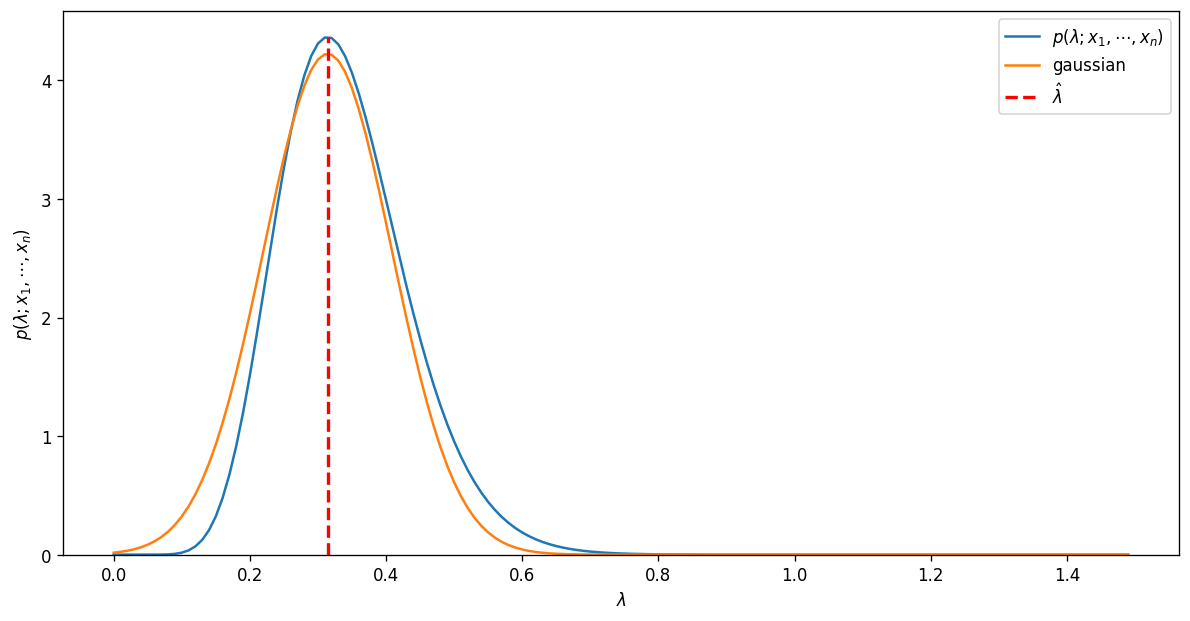

In [46]:
plt.figure(figsize=(12,6), dpi=120)
lam1, lam2, lam_step = 0, 1.5, 0.01
lam_range=np.arange(lam1, lam2, lam_step)
post_exp_v = np.vectorize(post_exp)
plt.plot(lam_range, post_exp_v(lam_range), label=r'$p(\lambda;x_1,\cdots,x_n)$')
plt.plot(lam_range, norm.pdf(lam_range, loc=lam0,scale=sigma_lam), label='gaussian')
lam0 = 1/x_obs.mean()
plt.plot([lam0,lam0], [0,post_exp(lam0)], color='red', linewidth=2, linestyle='--', label=r'$\hat{\lambda}$')
plt.ylim(bottom=0)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$p(\lambda;x_1,\cdots,x_n)$')
plt.legend()
plt.show()

## Inferenza bayesiana come apprendimento

L'uso della funzione di verosimiglianza per misure ripetute permette un'interpretazione interessante dell'inferenza bayesiana:

$\displaystyle p(\theta;x_1,\cdots,x_n) = \frac{p(x_1, \cdots, x_n;\theta)\,\pi(\theta)}{\int p(x_1, \cdots, x_n;\theta^\prime)\,\pi(\theta^\prime)\,\mathrm{d}\theta^\prime}$

dove:

$\displaystyle p(x_1, \cdots, x_n;\theta) = \prod_{i=1}^n p(x_i;\theta)$

Abbiamo quindi:

$\displaystyle p(\theta;x_1,\cdots,x_n) = \frac{\prod_{i=1}^n p(x_i;\theta)\,\pi(\theta)}{\int \prod_{i=1}^n p(x_i;\theta^\prime)\,\pi(\theta^\prime)\,\mathrm{d}\theta^\prime}$

Considerando che il denominatore è solo un termine di normalizzazione, possiamo porlo uguale ad $1/C_n$:

$\displaystyle p(\theta;x_1,\cdots,x_n) = C_n\prod_{i=1}^n p(x_i;\theta)\,\pi(\theta)$

Immaginiamo di applicare questo approccio ripetutamente, prima per $x_1$, poi per $x_2$, fino ad $x_n$. Otterremo una successione di PDF ciascuna che si può ottenere dalla precedente:

$\displaystyle p^{(0)}(\theta) = C_0\pi(\theta)$

$\displaystyle p^{(1)}(\theta) = C_1p(x_1;\theta)\,\pi(\theta) = K_1p(x_1;\theta) p^{(0)}(\theta)$

$\displaystyle p^{(2)}(\theta) = C_2p(x_1, x_2;\theta)\,\pi(\theta) = K_2p(x_2;\theta) p^{(1)}(\theta)$

$\cdots$

$\displaystyle p^{(n)}(\theta) = C_np(x_1,\cdots, x_n;\theta)\,\pi(\theta) = K_np(x_n;\theta) p^{(n-1)}(\theta)$

Si può quindi considerare il processo di inferenza bayesiana come apprendimento, via via che le nuove informazioni sono incluse nel calcolo. Partendo da una *prior*, ad ogni osservazione, la PDF viene modificata ottenendo una *posterior* aggiornata.

x_1 = 3.528
x_2 = 0.318
x_3 = 4.292
x_4 = 0.267
x_5 = 0.146
x_6 = 0.201
x_7 = 0.223
x_8 = 0.166
x_9 = 0.618
x_10 = 1.100
x_11 = 0.452
x_12 = 0.273


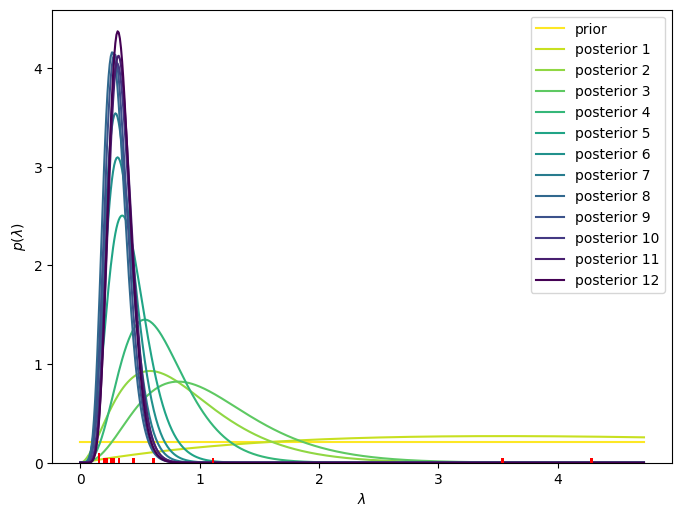

In [49]:
plt.figure(figsize=(8,6), dpi=100)
plt.hist(1./x_obs,bins=200, density=False, weights=[0.05]*len(x_obs), color='r', zorder=100)
npts = 500
lam1, lam2 = 0, (1./x_obs).max()*1.1
lam_step = (lam2-lam1)/npts
lam_range=np.linspace(lam1, lam2, npts)
def prior_unif(lam):
    return 1
def prior_exp(lam):
    return math.exp(-4*lam)
prior = prior_unif
colormap =plt.get_cmap('viridis')
colors = np.linspace(1, 0, len(x_obs)+1)
posterior = np.vectorize(prior)(lam_range)
posterior = posterior/posterior.sum()/lam_step
plt.plot(lam_range,posterior, label='prior', color=colormap(0.999))
for x_i, c, i in zip(x_obs, colors[1:], range(1,len(x_obs)+1)):
    posterior = posterior * lam_range*np.exp(-lam_range*x_i)
    posterior = posterior/posterior.sum()/lam_step
    print('x_{:d} = {:.3f}'.format(i, 1/x_i))
    plt.plot(lam_range, posterior, label='posterior {:d}'.format(i), color=colormap(c))
plt.legend()
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$p(\lambda)$')
plt.show()

Proviamo un esempio simile con una distribuzione gaussiana, dove ci aspettiamo una distribuzione più simmetrica.

Abbiamo a disposizione due *prior*:
* una PDF uniforme
* una PDF esponenziale

Vedremo che, al crescere del numero di osservazioni, la sensibilità alla *prior* diventa sempre meno importante.

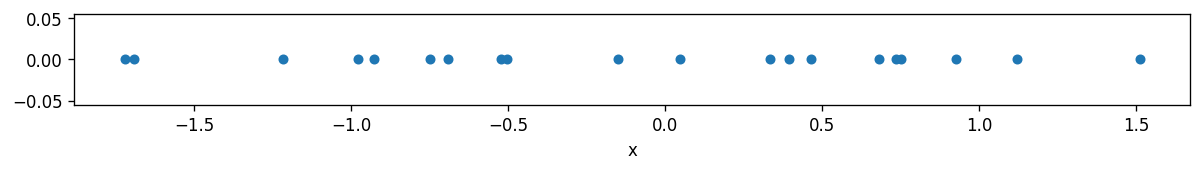

In [16]:
from scipy.stats import norm
mu = 0
x_obs = norm.rvs(size=20)
plt.figure(figsize=(12,1), dpi=120)
plt.plot(x_obs, np.zeros(len(x_obs)), '.', markersize=10)
plt.xlabel('x')
plt.show()

x_1 = -1.216
x_2 = 1.121
x_3 = -1.692
x_4 = 0.681
x_5 = 1.511
x_6 = 0.734
x_7 = -1.720
x_8 = -0.693
x_9 = -0.152
x_10 = 0.925
x_11 = -0.749
x_12 = -0.522
x_13 = 0.750
x_14 = 0.048
x_15 = -0.505
x_16 = 0.335
x_17 = -0.927
x_18 = 0.463
x_19 = -0.977
x_20 = 0.394


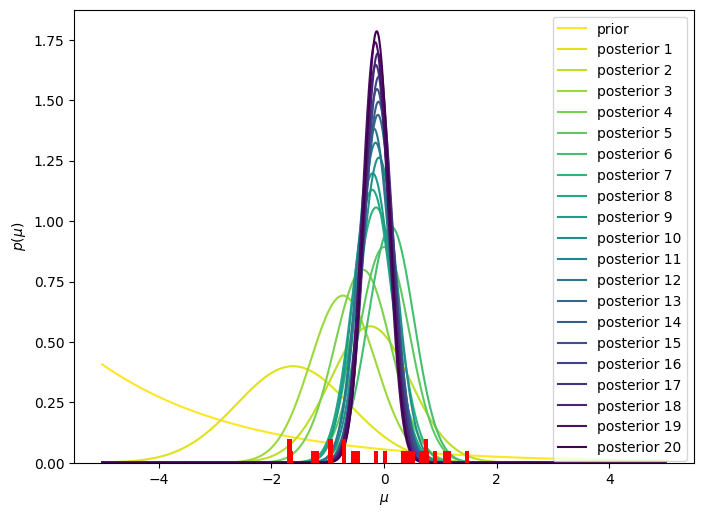

In [18]:
def prior_unif(mu):
    return 1
def prior_exp(mu):
    return math.exp(-0.4*mu)
# prior choice
prior = prior_exp

plt.figure(figsize=(8,6), dpi=100)
mu1, mu2, n_mu = -5, 5, 1000
mu_step = (mu2 - mu1)/n_mu
mu_range=np.linspace(mu1, mu2, n_mu)
colormap = plt.get_cmap('viridis')
colors = np.linspace(1, 0, len(x_obs)+1)
posterior = np.vectorize(prior)(mu_range)
posterior = posterior/posterior.sum()/mu_step
plt.plot(mu_range, posterior, label='prior', color=colormap(0.999))
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(\mu)$')
plt.legend(loc='upper right')
plt.savefig('img_out/bayesian-posterior-0.png')
for x_i, c, i in zip(x_obs, colors[1:], range(1,len(x_obs)+1)):
    plt.hist(x_obs[:i],bins=40, density=False, weights=[0.05]*len(x_obs[:i]), color='r', zorder=100)
    posterior = posterior*norm.pdf(mu_range, loc=x_i)
    posterior = posterior/posterior.sum()/mu_step
    print('x_{:d} = {:.3f}'.format(i, x_i))
    plt.plot(mu_range, posterior, label='posterior {:d}'.format(i), color=colormap(c))
    plt.legend(loc='upper right')
    plt.savefig('img_out/bayesian-posterior-{:d}.png'.format(i))
plt.show()

Possiamo comporre insieme le varie immagini con il modulo [```imageio```](https://imageio.readthedocs.io/en/stable/examples.html)

In [25]:
import imageio
with imageio.get_writer('img_out/bayesian.gif', mode='I', fps=3) as writer:
    for filename in ['img_out/bayesian-posterior-{:d}.png'.format(i) for i in range(len(x_obs)+1)]:
        image = imageio.imread(filename)
        writer.append_data(image)

<img src="img_out/bayesian.gif" width="750" align="center">

## Distribuzioni a priori informative e non informative

Se non abbiamo informazioni riguardo un parametro, dobbiamo usare una PDF a priori che non sia troppo differente tra un valore e l'altro. Una distribuzione *uniforme* esprime la nostra ignoranza, ossia il massimo dell'indecisione tra i possibili valori.

Bisogna notare che una PDF costante su un intervallo infinito non è integrabile, quindi non potrebbe essere normalizzata. Lo stesso vale per altre funzioni (es.: $1/x$). Si parla in questi casi di **distribuzione impropria**. Si tratta di una classe di PDF che, se trattate con rigore matematico, non possono essere funzioni ordinarie, così come la delta di Dirac.

Il fatto però che la PDF sia moltiplicata per la funzione di verosimiglianza, che tipicamente si smorza rapidamente per valori estremi, risolve questo problema.

Se invece abbiamo informazioni a priori sui possibili valori, possiamo usare una PDF che modelli il nostro grado di conoscenza sul valore vero, ovvero sull'incertezza che abbiamo.

# Spunti per esercizi
* Provare a calcolare intervalli al 68% di credibilità scegliendo un criterio per la scelta del tipo di intervallo (es.: aree uguali nelle code a sinistra e destra, intervallo centrale o altro).

* Determinare con l'inferenza bayesiana la probabilità di ottenere "testa" nel lancio di una moneta, possibilmente truccata trovando la distribuzione di probabilità a posteriori per successivi lanci di moneta simulati con una probabilità $p$ non necessariamente uguale a 0.5.

Ricordiamo la distribuzione di Bernoulli (testa=1, croce=0):

* $P(0;p) = 1-p$
* $P(1;p) = p$

Estratto $x$ che può valere 0 o 1:

$\displaystyle p(p; x) = \frac{P(x;p)\,\pi(p)}{\int_0^1 P(x;p^\prime)\,\pi(p^\prime)\,\mathrm{d}p^\prime}$

Assumiamo $\pi(p)=1$.



In [20]:
from scipy.stats import bernoulli

In [21]:
p0 = 0.8
x_obs = bernoulli.rvs(p0, size=18)

In [22]:
x_obs

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [23]:
def prior(p):
    return 1
p1, p2, n_p = 0, 1, 1001
p_step = (p2 - p1)/n_p
p_range=np.linspace(p1, p2, n_p)
colormap = plt.get_cmap('viridis')
colors = np.linspace(1, 0, len(x_obs)+1)
posterior = np.vectorize(prior)(p_range)
posterior = posterior/posterior.sum()/p_step

x_1 = 1.000
x_2 = 1.000
x_3 = 1.000
x_4 = 1.000
x_5 = 0.000
x_6 = 1.000
x_7 = 1.000
x_8 = 1.000
x_9 = 1.000
x_10 = 1.000
x_11 = 1.000
x_12 = 1.000
x_13 = 1.000
x_14 = 1.000
x_15 = 1.000
x_16 = 0.000
x_17 = 1.000
x_18 = 1.000


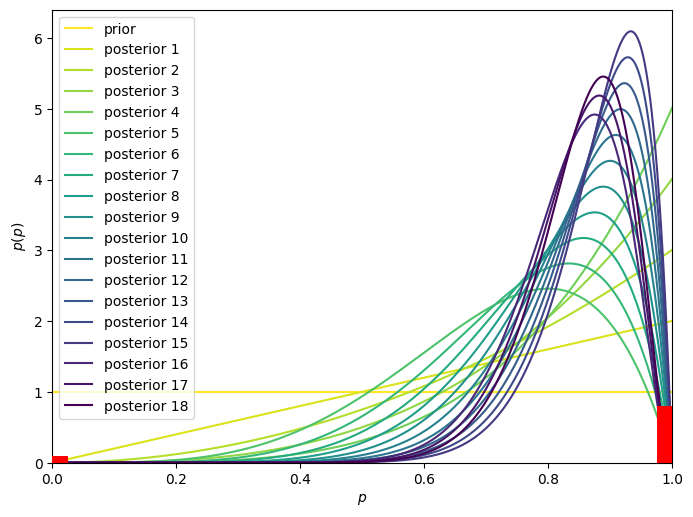

In [24]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(p_range, posterior, label='prior', color=colormap(0.999))
plt.xlabel(r'$p$')
plt.ylabel(r'$p(p)$')
i = 1
one_minus_p_range = 1-p_range
for x_i, c in zip(x_obs, colors[1:]):
#    posterior *= bernoulli.pmf(x_i, p_range)
#    posterior *= (p_range if x_i==1 else one_minus_p_range)
    if x_i == 1: posterior *= p_range
    else: posterior *= one_minus_p_range
    posterior = posterior/(posterior[:-1]).sum()/p_step
    print('x_{:d} = {:.3f}'.format(i, x_i))
    plt.plot(p_range, posterior, label='posterior {:d}'.format(i), color=colormap(c))
    i += 1
plt.hist(x_obs, bins=40, density=False, weights=[0.05]*len(x_obs[:i]), color='r', zorder=100)
plt.xlim(0,1)
plt.legend()
plt.show()

Il risultato finale, se la prior $\pi(p)$ è uniforme, è il prodotto di $k$ termini $p$ e di $N-n$ termini $1-p$, dove $n$ e $N-n$ sono il numero di "teste" e di "croci". 

La posterior finale è quindi una distribuzione beta:

$p(p;x_1,\cdots,x_n) = C p^n(1-p)^{N-n} = \beta(p; n+1, N-n+1)$

Dove $C$ è un coefficiente di normalizzazione.

Queto è consistente con il risultato ottenuto per l'inferenza del parametri $p$ in una distribuzione binomiale.